In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/maliki/Images/Intel'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-23 10:25:37.077923: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 10:25:37.078104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 10:25:37.242288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


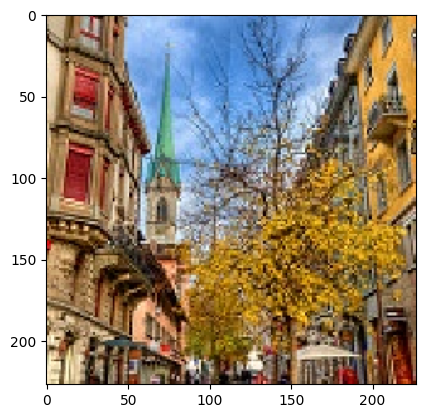

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/kaggle/input/intel-image-classification/seg_pred/seg_pred/10004.jpg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()

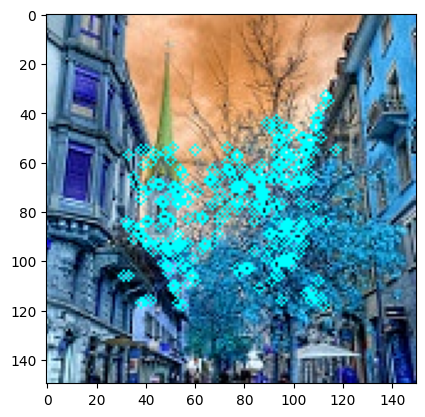

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

orb = cv2.ORB_create()
im = cv2.imread('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10004.jpg')
plt.imshow(im)

# Function for plotting keypoints
def draw_keypoints(vis, keypoints, color=(0, 255, 255)):
    for kp in keypoints:
        x, y = kp.pt
        plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

# Plotting the keypoints
kp = orb.detect(im, None)
kp, des = orb.compute(im, kp)
img = draw_keypoints(im, kp)


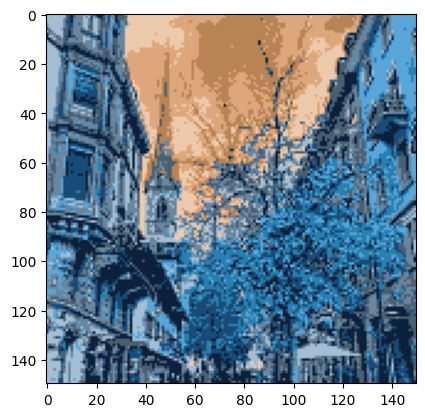

In [4]:
import numpy as np
import cv2
#img = cv2.imread('OpenCV.PNG')
img = cv2.imread('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10004.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
10, 1.0) 
K = 10
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(img)
plt.imshow(res2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [5]:
import os
import cv2
import numpy as np

# Définir les chemins vers vos dossiers d'images
dataset_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
categories = ['buildings','forest','glacier', 'mountain', 'sea','street']  #  catégories

# Fonction pour charger et prétraiter les images
def load_data(sample_size=1150, image_size=(50, 50)):
    X, y = [], []
    for category_id, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, category)
        images = os.listdir(folder_path)
        np.random.shuffle(images)  # Mélanger aléatoirement les images
        for img in images[:sample_size]:
            img_path = os.path.join(folder_path, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, image_size)  # Redimensionner l'image
            X.append(image)
            y.append(category_id)
    return np.array(X), np.array(y)

# Charger un échantillon de données
X, y = load_data(sample_size=2300, image_size=(50, 50))

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplatir les images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Maintenant, vous pouvez entraîner votre modèle SVM
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)

# Entraîner le modèle SVM avec les données aplaties
classifier.fit(X_train_flat, y_train)

# Faire des prédictions
y_pred = classifier.predict(X_test_flat)

print(y_pred)

[5 4 1 ... 3 0 3]


In [6]:
from sklearn.metrics import accuracy_score

# Calculer le taux d'erreur
accuracy = accuracy_score(y_test, y_pred)

print("Taux d'erreur :", 1 - accuracy)
print("Taux de précision :", accuracy)


Taux d'erreur : 0.35447214076246336
Taux de précision : 0.6455278592375366


In [7]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

Matrice de confusion :
 [[254  29  29  34  35  68]
 [ 15 397   2  10   8  51]
 [ 24   4 299  52  48  19]
 [ 31  10  50 309  42   9]
 [ 39  21  82  90 227  22]
 [ 80  24  15  13  11 275]]
